In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ddfUtils import *
from ddfRoot import *
from sndUtils import *
from scipy import odr
from scipy.special import erfc

plt.style.use("root")

Welcome to JupyROOT 6.28/12


In [ ]:
runs = [5888, 8329]

In [3]:
h_xz = {
    run: {
        tt: getAsPandas(uproot.open(f"/eos/user/i/idioniso/mfout/TrackProperties.root:Run{run}/h_xz_{tt}_{run}")) for tt in [1, 11, 3, 13]
    } for run in runs
}

In [4]:
h_xz[7080][13].query("x>-25 and x<25")

,x,y,ex,ey
14,-5.8,1469868.0,20.0,1212.381128
15,14.2,2248944.0,20.0,1499.647959


In [5]:
RUN = 10241

Sigma = {tt: 2*h_xz[RUN][tt].loc[h_xz[RUN][tt]["x"] < 4.5, 'y'].sum() / h_xz[RUN][tt]['y'].sum() for tt in [1, 11, 3, 13]}
print(Sigma)

{1: 0.43737796373779636, 11: 0.47167699013535214, 3: 0.48597769448411315, 13: 0.4720852958002555}


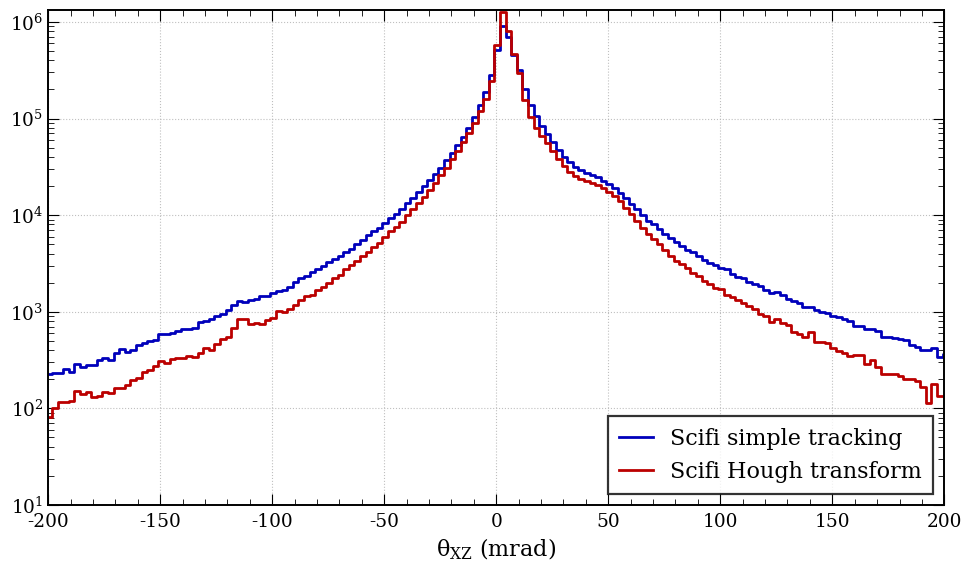

In [8]:
RUN = 5888

plt.figure(figsize=(10, 6))
for tt in [1, 11]:
    h = h_xz[RUN][tt]
    if h is None:
        continue
    x = h["x"]
    y = h["y"]

    plt.step(x, y, label=f"{system(tt)} {algorithm(tt)}", lw=2, where="mid")

# plt.title(f"Run {RUN}")
plt.xlabel("$\\theta_{XZ}$ (mrad)")
plt.xlim(-200, 200)
plt.ylim(10,)
plt.yscale("log")
plt.legend(loc="lower right", fontsize=16)
plt.grid()
plt.tight_layout()
plt.show()

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


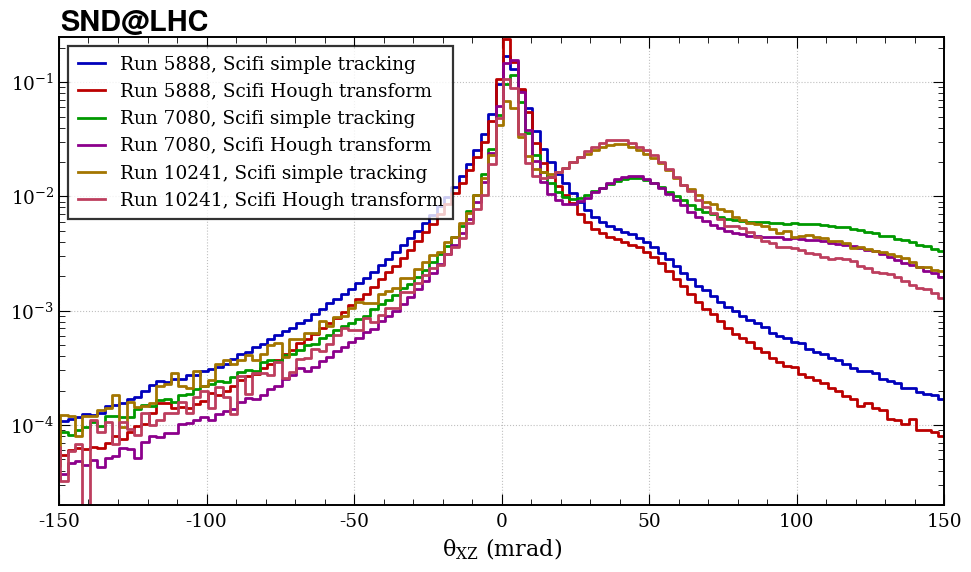

In [9]:
from mplStyling import *
plt.figure(figsize=(10, 6))
for run in runs:
    for tt in [1, 11]:
        h = h_xz[run][tt]
        if h is None:
            continue
        x = h["x"]
        y = h["y"] / h["y"].sum()

        plt.step(x, y, label=f"Run {run}, {system(tt)} {algorithm(tt)}", lw=2)
plt.xlabel("$\\theta_{XZ}$ (mrad)")
plt.xlim(-150, 150)
plt.ylim(2e-5,)
plt.yscale("log")
plt.legend()
plt.grid()
addMplLabel()
plt.tight_layout()
plt.show()